In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mysql.connector
cnx = mysql.connector.connect( 
    host ="127.0.0.1" ,
    port = 3306 ,
    user = "root",
password = "mysql1996!" )

In [3]:
query = " select * from banking_case.customer"

In [4]:
df = pd.read_sql(query,cnx)

/var/folders/vl/l17yt_jx1kdgs6w9y_b_wtjr0000gn/T/ipykernel_49855/1565249183.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,cnx)


In [5]:
df.head(6)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
5,IND78532,Samuel Hudson,23,13204,07-02-2019,Douglas Tucker,American,Help Desk Technician,High,Silver,...,1307269.41,745627.74,238310.37,15615.18,1556031.06,1,2,1,1,6


In [6]:
df.shape

(3000, 25)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   object        
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

In [8]:
df.rename(columns= lambda x: x.lower().replace(' ', '_'), inplace=True)

In [9]:
#Check for null values on rows
df[df.isnull().any(axis=1)]  # View rows with missing data

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid


In [10]:
#Check for Duplicated rows
df.duplicated().sum()

np.int64(0)

In [11]:
#Replacing column values
df['genderid'] = df['genderid'].replace({1: 'Male', 2: 'Female'})
df['brid'] = df['brid'].replace({
    1: 'Retail',
    2: 'Institutional',
    3: 'Private Bank',
    4: 'Commercial'} )
df['iaid'] = df['iaid'].replace(
  { 1: "Victor Dean",
    2: "Jeremy Porter",
    3: "Ernest Knight",
    4: "Eric Shaw",
    5: "Kevin Kim",
    6: "Victor Rogers",
    7: "Eugene Cunningham",
    8: "Joe Carroll",
    9: "Steve Sanchez",
    10: "Lawrence Sanchez",
    11: "Peter Castillo",
    12: "Victor Gutierrez",
    13: "Daniel Carroll",
    14: "Carl Anderson",
    15: "Nicholas Ward",
    16: "Fred Bryant",
    17: "Ryan Taylor",
    18: "Sean Vasquez",
    19: "Nicholas Morrison",
    20: "Jack Phillips",
    21: "Juan Ramirez",
    22: "Gregory Boyd"})



In [12]:
#Changing datatype

In [13]:
#Convert into Categorical type
df["iaid"] = df["iaid"].astype("category")
df["genderid"] = df["genderid"].astype("category")
df["brid"] = df["brid"].astype("category")

In [42]:
df['joined_bank'] = pd.to_datetime(df['joined_bank'],  format='%d-%m-%Y')

In [15]:
df.describe()

,age,joined_bank,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting
count,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,2010-08-15 00:03:21.600000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333
min,17.000000,1995-01-03 00:00:00,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000
25%,34.000000,2004-04-01 18:00:00,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000
50%,51.000000,2011-02-18 00:00:00,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000
75%,69.000000,2017-12-24 06:00:00,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000
max,85.000000,2021-12-31 00:00:00,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000
std,19.854760,NaN,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191


In [16]:
#Examining Categorical Variables

In [17]:
bins = [0,100000,300000,float('inf')]
labels = ["Low","Med","High"]
df["income_band"] = pd.cut(df["estimated_income"],bins = bins , labels=labels,right=False)

<Axes: xlabel='income_band'>

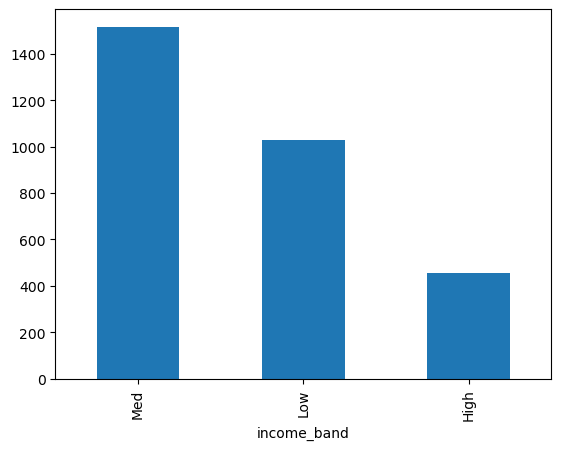

In [18]:
df["income_band"].value_counts().plot(kind="bar")

In [44]:
#sorted(df["joined_bank"].unique(),reverse = True)

In [39]:
bins = [
    pd.Timestamp("1995-01-01"),
    pd.Timestamp("2005-01-01"),
    pd.Timestamp("2015-01-01"),
    pd.Timestamp("2100-01-01")  #to cover all dates after 2015
]

labels = ["1995–2005", "2005–2015", "2015 afterwards"]

df["joining_period"] = pd.cut(df["joined_bank"], bins=bins, labels=labels, right=False)

<Axes: xlabel='joining_period'>

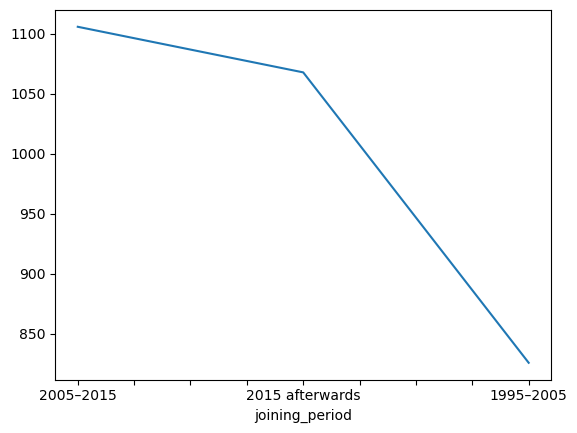

In [40]:
df["joining_period"].value_counts().plot()

In [22]:
#Other categorical columns
categorical_cols = df[["nationality","occupation","fee_structure","loyalty_classification","amount_of_credit_cards","properties_owned","risk_weighting","brid","genderid","iaid","income_band","joining_period"]]

for x in categorical_cols : 
    print(f"Value Counts for '{x}' :")
    display(df[x].value_counts())
    print()

Value Counts for 'nationality' :


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value Counts for 'occupation' :


occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for 'fee_structure' :


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value Counts for 'loyalty_classification' :


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value Counts for 'amount_of_credit_cards' :


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64


Value Counts for 'properties_owned' :


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value Counts for 'risk_weighting' :


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for 'brid' :


brid
Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: count, dtype: int64


Value Counts for 'genderid' :


genderid
Female    1512
Male      1488
Name: count, dtype: int64


Value Counts for 'iaid' :


iaid
Eric Shaw            177
Ernest Knight        177
Victor Dean          177
Jeremy Porter        177
Joe Carroll          177
Carl Anderson        176
Lawrence Sanchez     176
Victor Gutierrez     176
Steve Sanchez        176
Peter Castillo       176
Nicholas Ward        176
Daniel Carroll       176
Kevin Kim             89
Eugene Cunningham     89
Victor Rogers         89
Nicholas Morrison     88
Juan Ramirez          88
Jack Phillips         88
Ryan Taylor           88
Sean Vasquez          88
Gregory Boyd          88
Fred Bryant           88
Name: count, dtype: int64


Value Counts for 'income_band' :


income_band
Med     1517
Low     1027
High     456
Name: count, dtype: int64


Value Counts for 'joining_period' :


joining_period
2005–2015          1106
2015 afterwards    1068
1995–2005           826
Name: count, dtype: int64

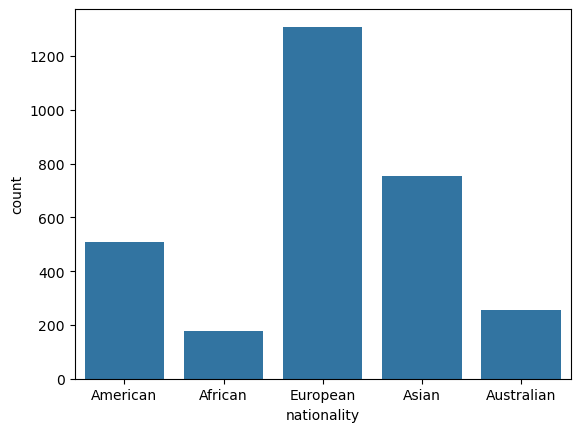

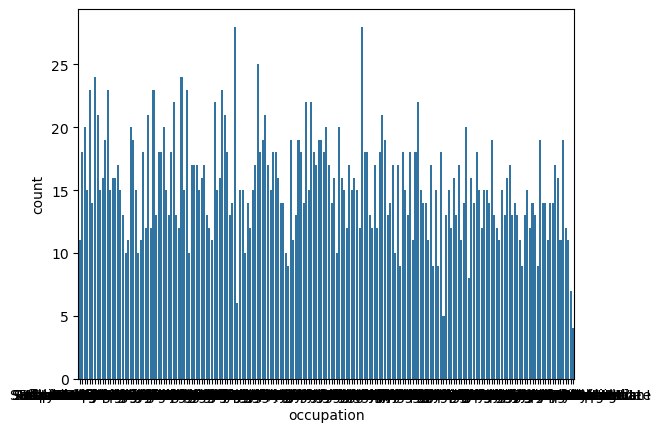

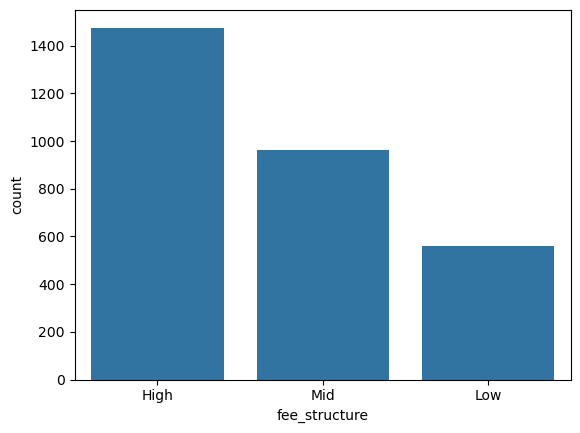

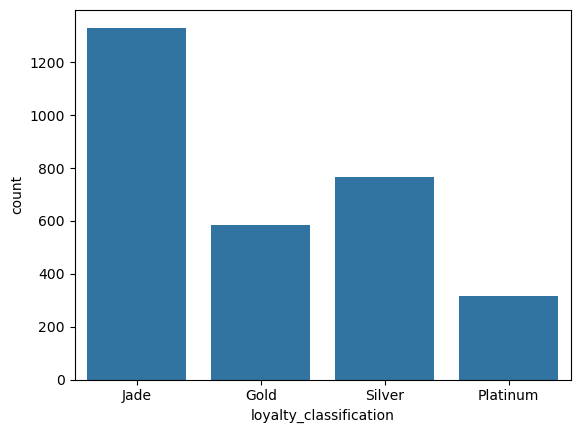

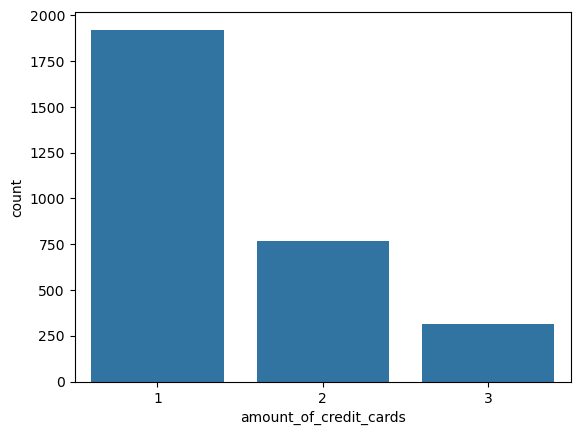

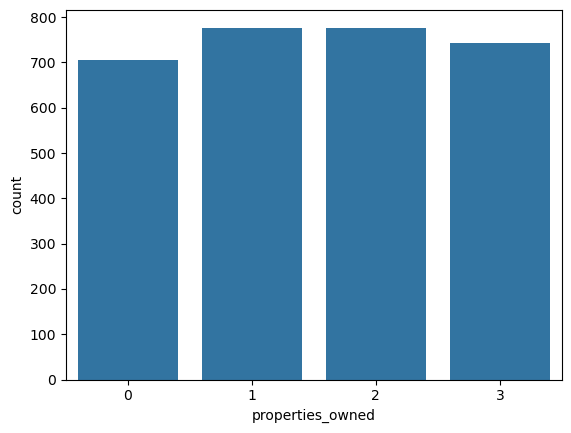

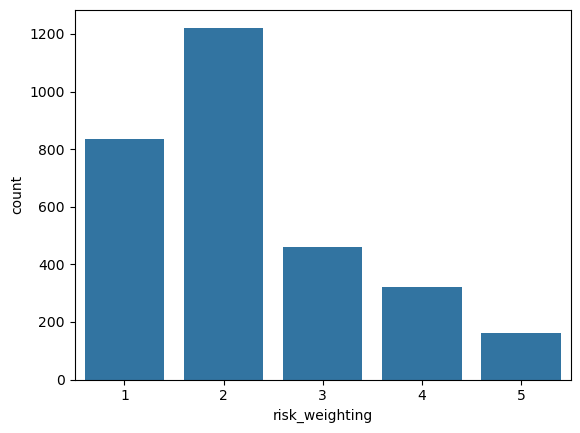

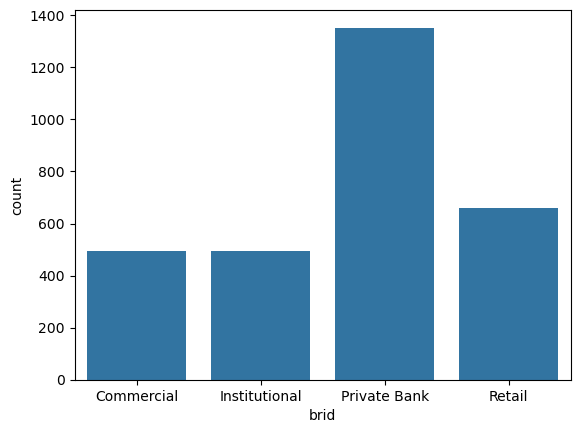

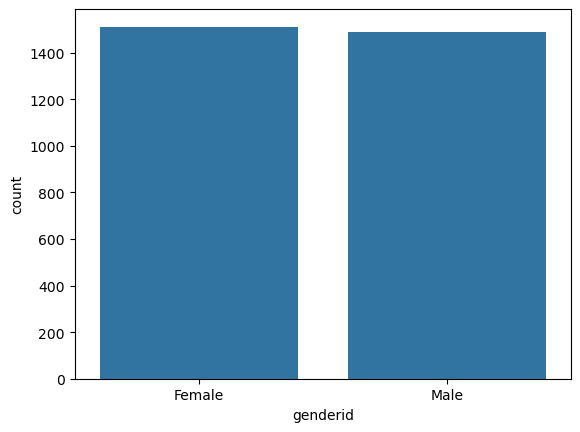

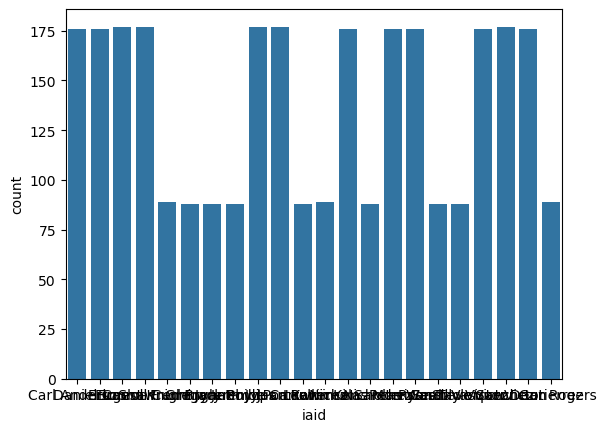

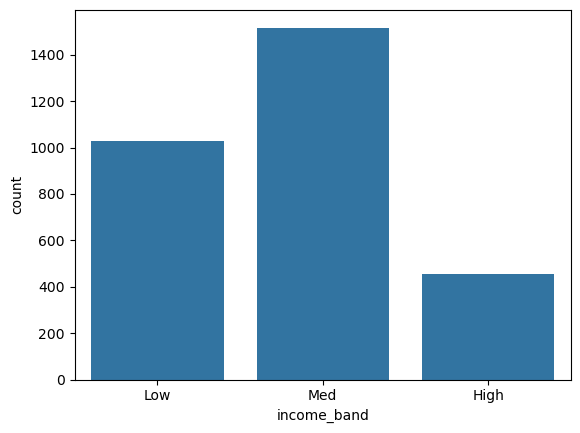

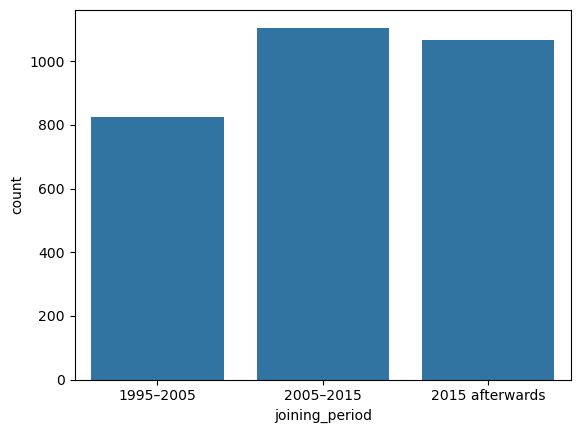

In [36]:
#UNIVARIATE ANALYSIS

for i , predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df , x=predictor)

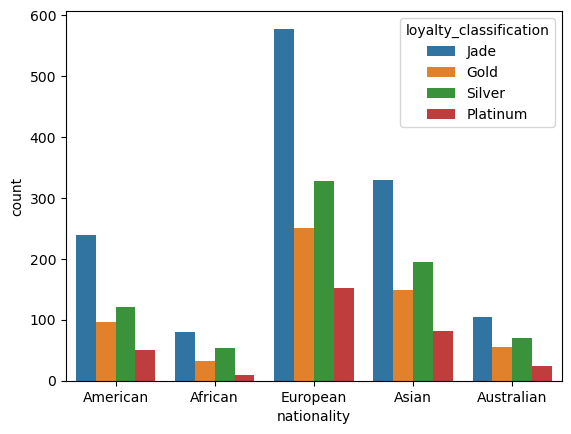

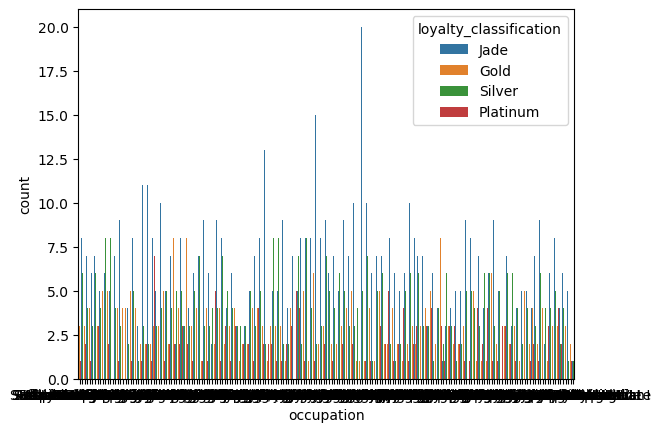

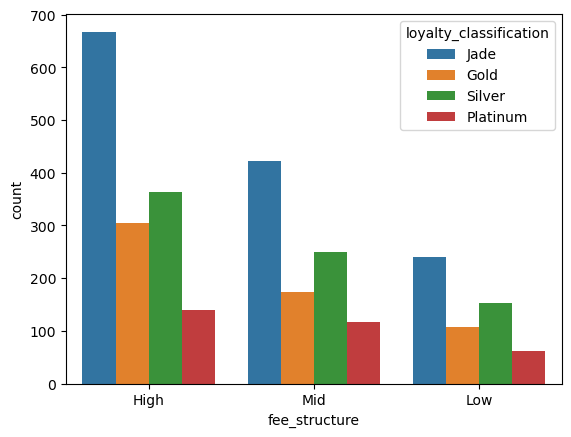

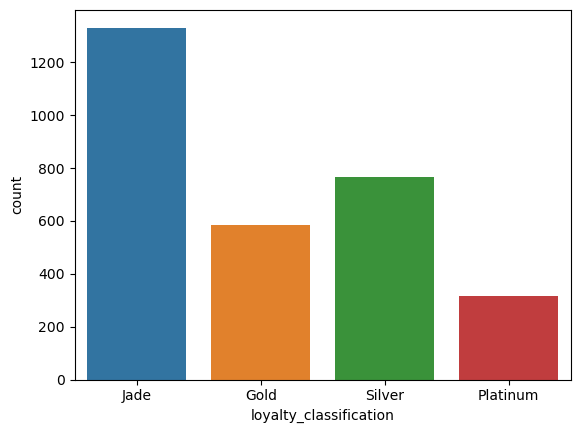

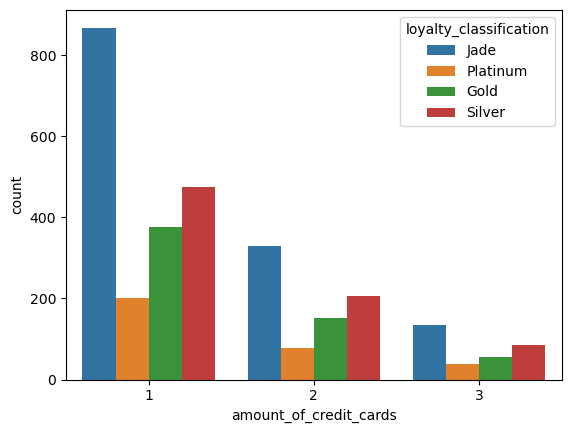

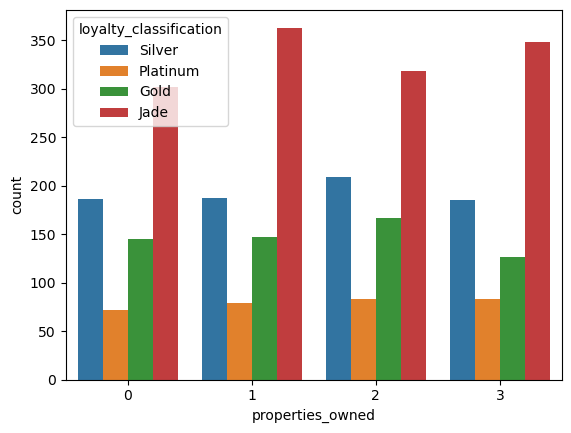

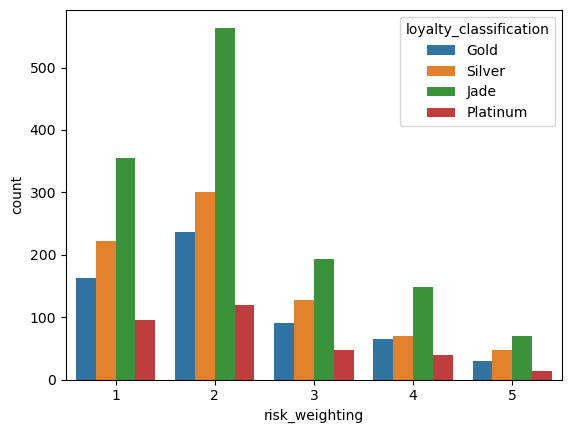

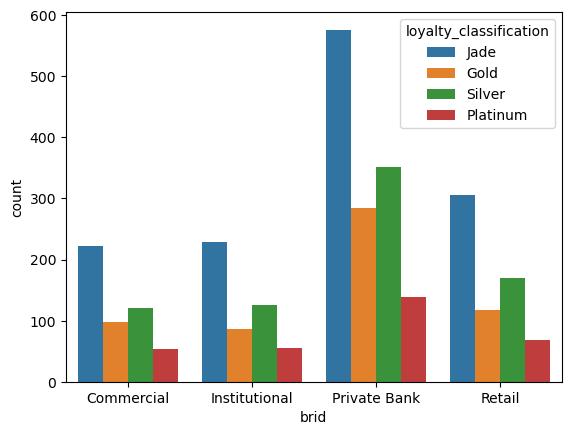

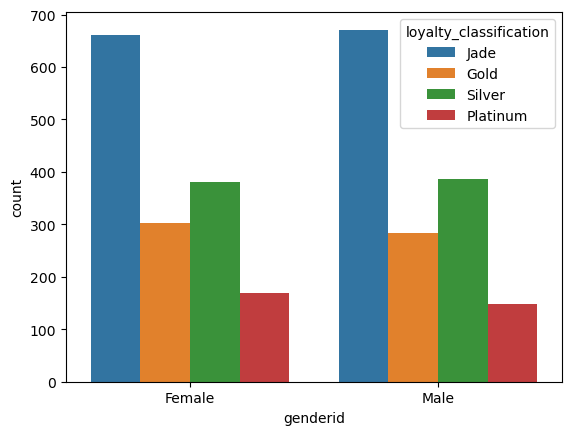

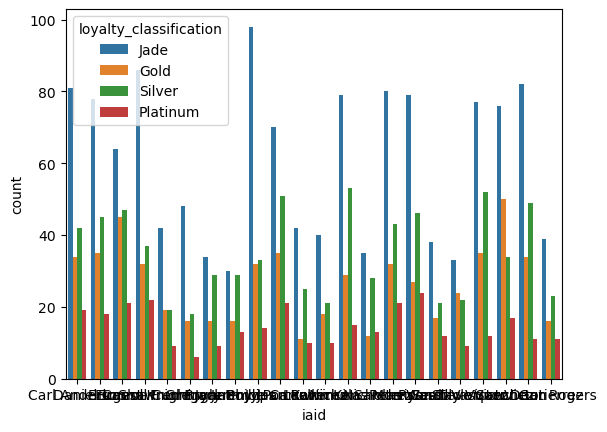

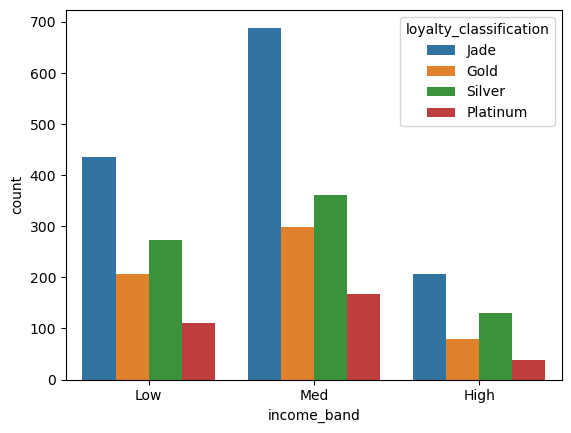

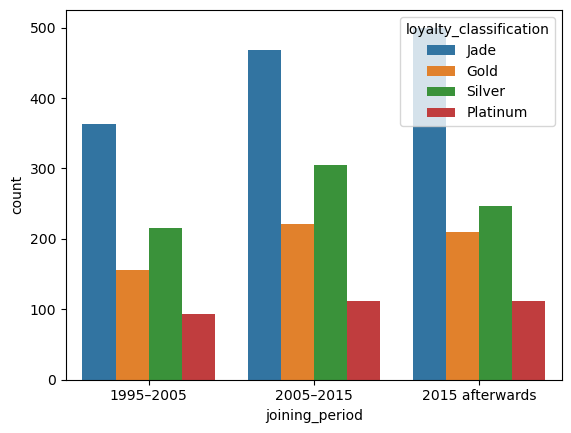

In [35]:
#BIVARIATE ANALYSIS

for i , predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df , x=predictor ,hue ="loyalty_classification")

In [45]:
numerical_cols = ['age', 'estimated_income', 'superannuation_savings', 'credit_card_balance',
                  'bank_loans', 'bank_deposits', 'checking_accounts', 'saving_accounts',
                  'foreign_currency_account', 'business_lending']

correlation_matrix = df[numerical_cols].corr()

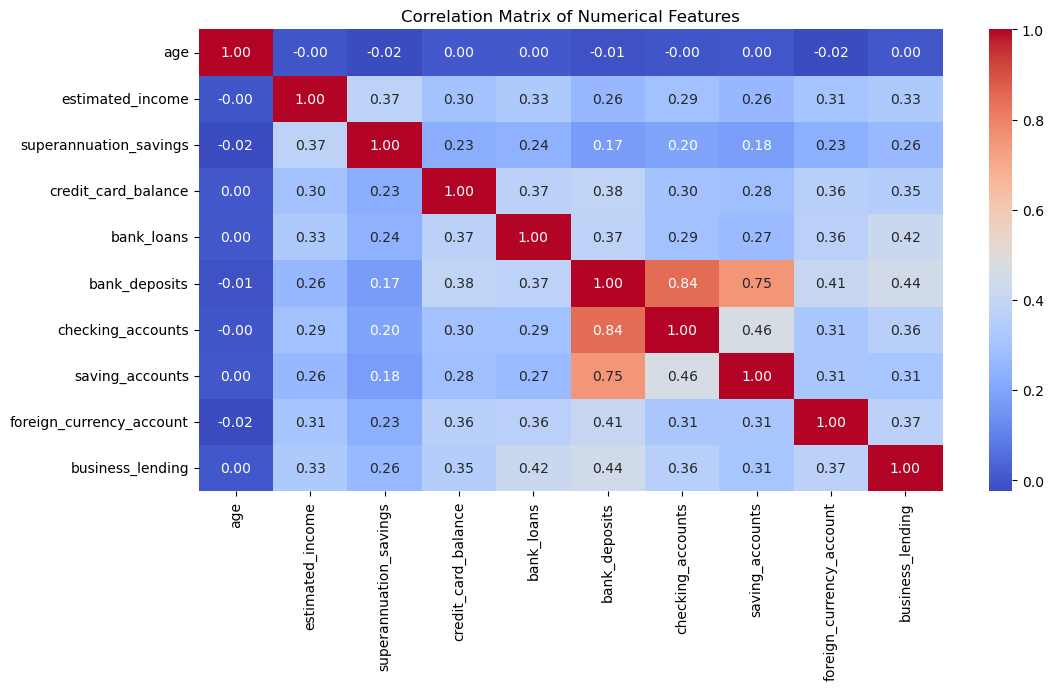

In [51]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [55]:
#--->  #Customers with more bank_deposits have higher checking_account balances.
#--->  #Customers with more bank_deposits also have higher savings_account balances.
    
#--->  #checking_accounts and bank_deposits both being used in a model may cause multicollinearity

#--->  #Age has almost no correlation with any other feature



In [59]:
df.to_csv('banking_domain.csv', index = False)

In [ ]:
files.download('banking_domain.csv')